# Homework 4
Deadline: 2nd February 23:59, delivered to your tutor.





# Exercise: Understanding Independence and Correlation

## Background Information

1. **Independence of Random Variables**  
   Two random variables $X$ and $Y$ are said to be independent if the occurrence of one does not affect the probability of the other. Mathematically, this means:  
   $$
   P(X \leq x, Y \leq y) = P(X \leq x)P(Y \leq y) \quad \text{for all } x, y.
   $$
   Equivalently, their joint probability density function (pdf) or mass function can be written as the product of their marginal pdfs or mass functions:  
   $$
   f_{X,Y}(x, y) = f_X(x)f_Y(y).
   $$

2. **Correlation**  
   The correlation between two random variables $X$ and $Y$ is a measure of their linear relationship, defined as:  
   $$
   \rho(X, Y) = \frac{\text{Cov}(X, Y)}{\sqrt{\text{Var}(X)\text{Var}(Y)}}.
   $$
   Here, $\text{Cov}(X, Y)$ is the covariance of $X$ and $Y$, and $\text{Var}(X)$ and $\text{Var}(Y)$ are their variances. If $\rho(X, Y) = 0$, it means there is no linear relationship between $X$ and $Y$, but they may still be dependent.

---

## Task 1a (0.5p)

   Find a specific example of two random variables $X$ and $Y$ such that:
   - $X$ and $Y$ are dependent.
   - The correlation $\rho(X, Y)$ is equal to $0$.

Attach proof, either as markdown code, or photo.


## Task 1b (0.5p)

You are given data file `data.csv`.
- Load the data and do the pairplots of features and target, what can you observe?
- Compute the correlations and plot, the correlation matrix, what can you conclude?
- Train a random forest prediction and plot the histogram of feature importances. How does it align with previous observations?

**Write your answers clearly!**

### taks 1a
let's define
* variation as var(x) = $\frac{1}{n - 1} \sum_i (x_i - x_{mean})^2$
* coveriance as cov(x, y) = $\frac{1}{n - 1} \sum_i (x_i - x_{mean})(y_i - y_{mean})$
* corelation as corr(x, y) = $\frac{cov(x, y)}{\sqrt{var(x) var(y)}}$

a good example of data wher X and Y are dependent but corelation is equal to 0 is circle:
$$ 
    x^2 + y^2 = 1 \\
    x^2 = 1 - y^2 \\
    x = \sqrt{1 - y^2} \ or \  x = -\sqrt{1 - y^2}
$$

let's pick points: (0, -1), (0, 1), (-1, 0), (1, 0) <br>
cov(x, y) = $\frac{1}{3} ((0 * (-1)) + (0 * 1) + (-1 * 0) + (1 * 0)) = 0$ <br>
so the correlation is equal to 0 (numerator = 0), but X and Y are dependent

another example: <br>
$y = sin^2(x)$ for $x \in [-\pi, \pi]$ (for points uniformly distributed) <br>
here we don't have discrete set so we have to define:
* expected value: $E[X] = \int_{-inf}^{inf} x f(x) dx$ ( formula from https://en.wikipedia.org/wiki/Expected_value)
* variance: $var(X) = E[X^2] - (E[X])^2$ (formula from https://en.wikipedia.org/wiki/Variance)
* covariance: $cov(X, Y) = E[XY] - E[X]E[Y]$ (formula from https://en.wikipedia.org/wiki/Covariance)

let's define 
$$
f(x) = \begin{cases}
   \frac{1}{2\pi} &\text{if } x \in [-\pi, \pi] \\
   0 &\text{otherwise} 
\end{cases}
$$

now when we have f(x) we can compute $E[X] = \int_{-\pi}^{\pi} x f(x) dx = \frac{1}{2\pi}\int_{-\pi}^{\pi} x dx = 0$ because our interval is simetric <br>
we need to compute $E[X^2] = \frac{1}{2\pi}\int_{-\pi}^{\pi} x^2 dx = \frac{1}{2\pi} \cdot \frac{2\pi^3}{3} = \frac{\pi^2}{3}$ <br>
and also let's compute $E[Y] = E[sin^2(X)] = \frac{1}{2\pi}\int_{-\pi}^{\pi} sin^2(X) dx$ we know that $sin^2(x) = \frac{1 - cos(2x)}{2}$ we can use that $E[Y] = \frac{1}{2\pi}\int_{-\pi}^{\pi} (\frac{1}{2} - \frac{cos(2X)}{2}) dx = \frac{1}{4\pi} [\int_{-\pi}^{\pi} 1 dx - \int_{-\pi}^{\pi} cos(2x)dx]$ <br>
* $\int_{-\pi}^{\pi} 1dx = 2\pi$
* $\int_{-\pi}^{\pi} cos(2x)dx = 0$

$E[Y] = \frac{1}{4\pi} [2\pi - 0] = \frac{1}{2}$

also we need $E[XY] = E[Xsin^2(X)] = \int_{-\pi}^{\pi}x sin^2(x) dx$ let me just give an answer E[XY] = 0

now we have evertyhing to compute $cov(X, Y) = E[XY] - E[X]E[Y] = 0 $ <br>
cov(X, Y) is equal to 0 so the $corr(X, Y) = 0$ (because cov is numerator equal to zero) <br>

conclusions: our X and Y are dependent, but correlation is equal to 0


In [3]:
# zad 1b
import pandas as pd
df = pd.read_csv('data.csv')
df

,Feature_1,Feature_2,Feature_3,Feature_4,Target
0,-2.509198,-4.659435,0.192049,-2.723849,24.368465
1,9.014286,7.572600,-0.309116,8.668076,55.108236
2,4.639879,5.948520,0.133541,3.936720,3.646965
3,1.973170,3.169037,-0.152470,1.931617,2.955899
4,-6.879627,7.011635,0.708109,-7.631987,0.975501
...,...,...,...,...,...
495,-2.932955,8.540019,0.194607,-2.915879,14.818737
496,1.673122,0.799143,-0.742471,1.129499,24.706681
497,-8.445307,6.840666,-1.320023,-8.988220,-3.153449
498,9.487896,0.419160,-0.611769,9.827583,37.293310


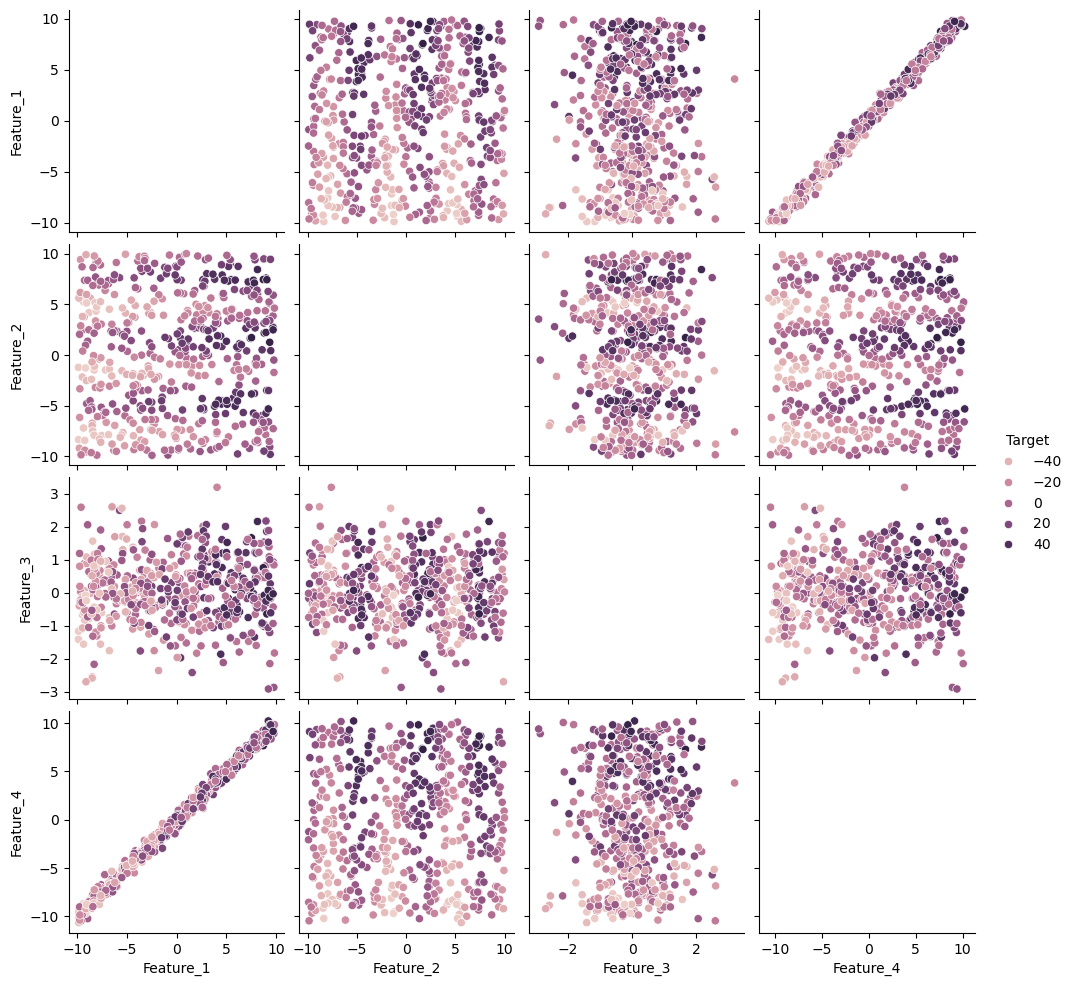

In [4]:
import seaborn as sns
sns.pairplot(df, hue='Target')

'''
    we see that:
        * there is very strong positive correlation between feature1 and feature4, cor ~ 1
        * the rest of the data is independent
'''

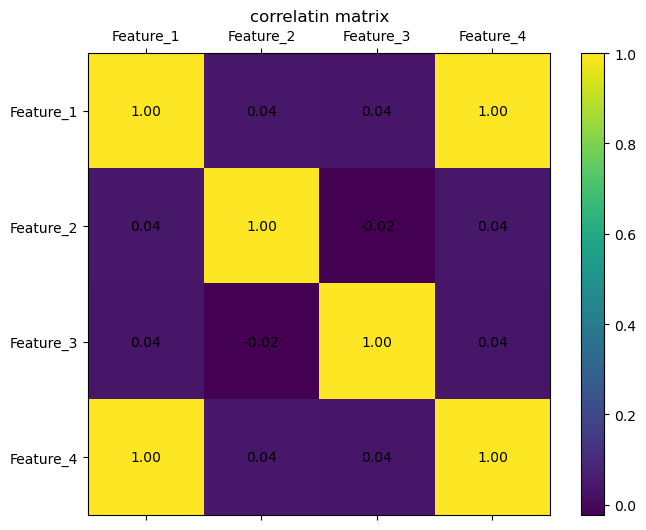

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def var(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    return (1 / (len(x) - 1)) * np.sum((x - mean_x) * (y - mean_y))

def corr(x, y):
    var_x = var(x, x)
    var_y = var(y, y)
    cov = var(x, y)
    
    return cov / np.sqrt(var_x * var_y)

features = ["Feature_1", "Feature_2", "Feature_3", "Feature_4"]
corr_matrix = np.zeros((4, 4))

for i, f1 in enumerate(features):
    for j, f2 in enumerate(features):
        corr_matrix[i, j] = corr(np.array(df[f1]), np.array(df[f2]))

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(corr_matrix)
fig.colorbar(cax)

ax.set_xticks(range(4))
ax.set_yticks(range(4))
ax.set_xticklabels(features)
ax.set_yticklabels(features)

for i in range(4):
    for j in range(4):
        ax.text(j, i, f"{corr_matrix[i, j]:.2f}", ha="center", va="center")
        
plt.title("correlatin matrix")
plt.show()

# conclusions: same as cell above
# oh I just realized there is a code provided for us 
data = df

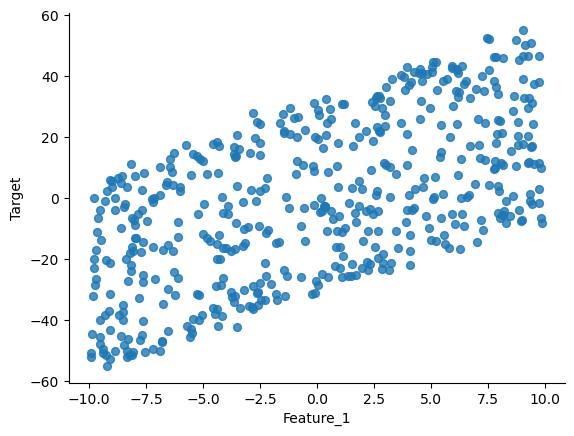

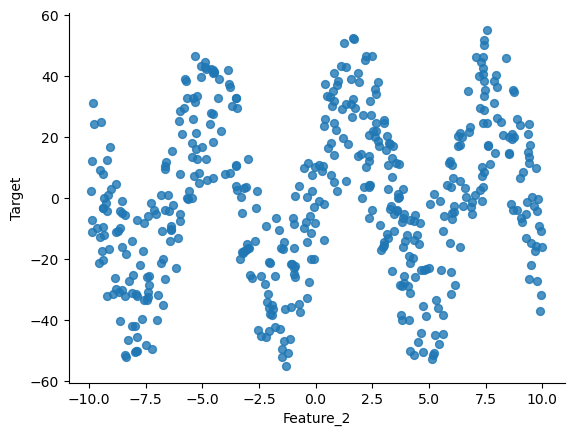

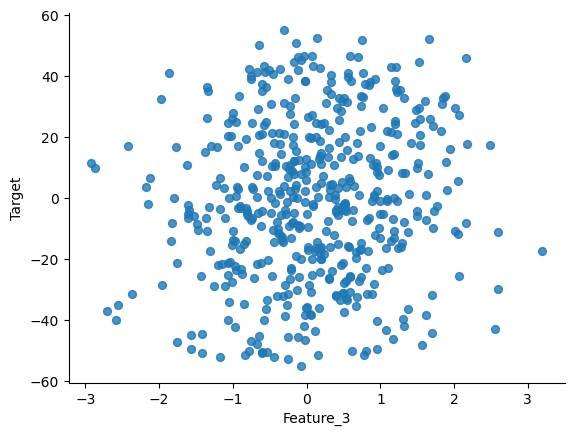

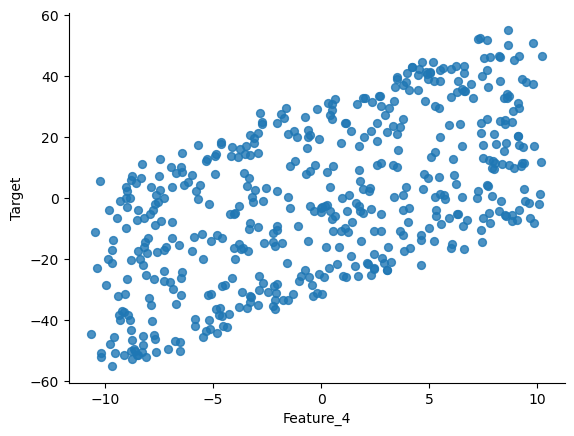

In [10]:
# @title Features vs Target
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Feature_1', y='Target', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

data.plot(kind='scatter', x='Feature_2', y='Target', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

data.plot(kind='scatter', x='Feature_3', y='Target', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

data.plot(kind='scatter', x='Feature_4', y='Target', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()


           Feature_1  Feature_2  Feature_3  Feature_4    Target
Feature_1   1.000000   0.044031   0.038552   0.996672  0.600176
Feature_2   0.044031   1.000000  -0.022952   0.042055  0.179238
Feature_3   0.038552  -0.022952   1.000000   0.038521  0.111958
Feature_4   0.996672   0.042055   0.038521   1.000000  0.593566
Target      0.600176   0.179238   0.111958   0.593566  1.000000


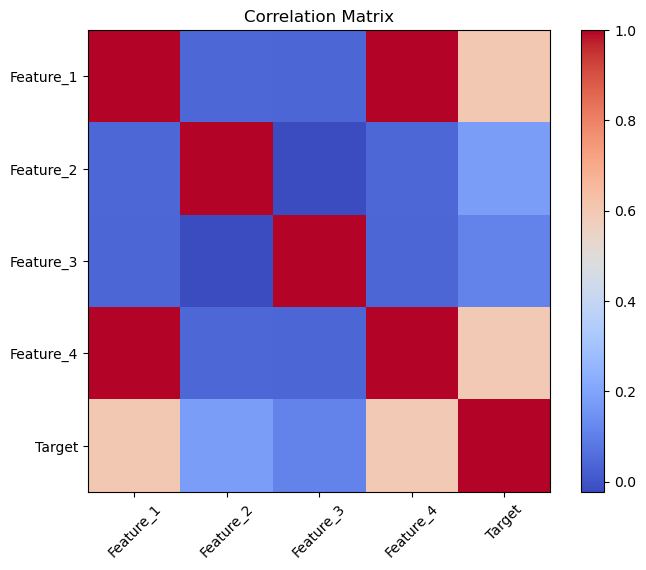

In [11]:
# prompt: correlations of random features with target

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# ... (Your existing code) ...

# Calculate correlations
correlations = data.corr()

# Print the correlation matrix
print(correlations)

# Visualize the correlations (optional)
plt.figure(figsize=(8, 6))
plt.imshow(correlations, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlations)), correlations.columns, rotation=45)
plt.yticks(range(len(correlations)), correlations.columns)
plt.title('Correlation Matrix')
plt.show()

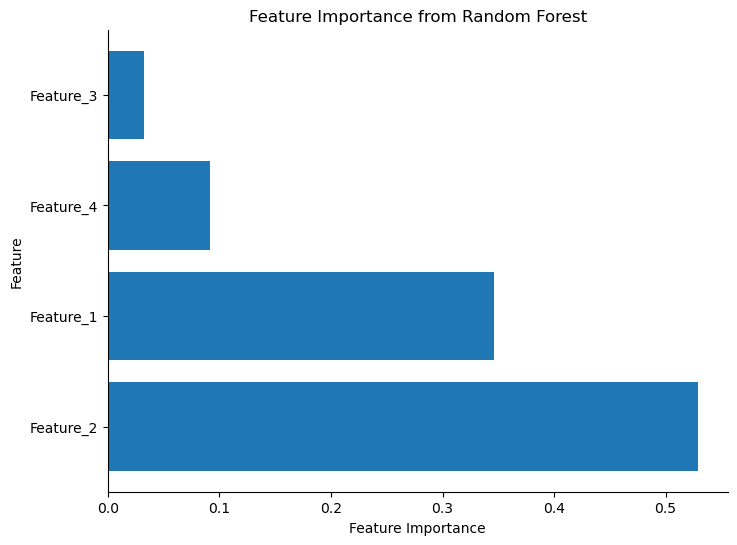

In [12]:
# prompt: do the same plot as above but ionstead of correlation use feature importance from random forest

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# ... (Your existing code) ...

# Calculate feature importances using RandomForest
rf = RandomForestRegressor(random_state=42)
rf.fit(data.drop("Target", axis=1), data["Target"])
importances = rf.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': data.drop("Target", axis=1).columns,
                             'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


# Visualize feature importances
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

### Conclusions for 1b
We see that Feature_2 is the most important feature, but the correlation matrix says that there is a small correlation between Feature_2 and the target. There is a much higher correlation between Feature_1 and the target and Feature_4 and the target, but they are much less important than Feature_2 (especially Feature_4).

Conclusions: correlation != importance for Random Forest

I think it's because we look for a linear correlation in our data, but data in Feature_2 is not linear

# Problem 2

Consider any dataset $X \in \mathbb{R}_n^d$, where $d$ is the number of columns, and $n$ is the number of samples. Let $\sum_{i=1}^d \mathcal{D}^2 X^i$ be the sum of variances of all the columns. Let $X_{pca} \in \mathbb{R}_n^d$ be the PCA transformed $X$ dataset. Show that $\sum_{i=1}^d \mathcal{D}^2 X^i = \sum_{i=1}^d \mathcal{D}^2 X_{pca}^i$.

Write the proof of this fact below. You can either do it in LaTeX, or you can write it in a reasonably elegant way on a piece of paper and paste an image here.

data:
* $X \in \R_n^d$ d: number of columns, n: number of samples
* $\sum_{i = 1}^d D^2X^i$ : sum of variances of all the columns
* $ X_{pca} \in \R_n^d$ : PCA transformed $X$ dataset

objective:
* $\sum_{i = 1}^d D^2X^i = \sum_{i = 1} ^ d D^2 X_{pca}^i$

Let's assume that $X$ is cenered (each column has mean zero) so the variance of sample is equal to $D^2(X^i) = \frac{1}{n - 1} \sum_{k = 1}^n(x_{k, i})^2$

when we sum all wariances we get $\sum_{i = 1}^d D^2 X^i = \frac{1}{n - 1}\sum_{i = 1} ^ d \sum_{k = 1}^n(x_{k, i})^2$

we can get our $X_{pca}$ using ortogonal matrix $W \in \R^{d \times d} \ (W^TW = I)$. $X_{pca} = XW$, 

lemma:
let's at first prove that for a vector $x \in \R^d$ norms are equal $|| xW || = ||x ||$
we define $|| x || := \sqrt{xx^T}$
simillary $|| xW || := \sqrt{(xW)(xW)^T}$

$$
    (xW)(xW)^T = xW(xW)^T = xW(W^Tx^T)a = x(WW^T)x^T \\
    WW^T = I \\
    (xW)(xW)^T = xW(xW)^T = xW(W^Tx^T)a = x(WW^T)x^T = x I x^T = xx^T
$$

so $(xW)(xW)^T = xx^T$ 
let's square both sites $\sqrt{(xW)(xW)^T} = \sqrt{xx^T}$
we get $|| xW || = || x ||$

we can back to our main proof, we have left site:
$$
\sum_{i = 1}^d D^2 X^i = \frac{1}{n - 1}\sum_{i = 1} ^ d \sum_{k = 1}^n(x_{k, i})^2 = \frac{1}{n - 1} \sum_{k = 1}^n \sum_{i = 1} ^ d (x_{k, i})^2 = \frac{1}{n - 1} \sum_{k = 1}^n || x_k || ^ 2
$$

simillary we can transform our right site:
$$
\sum_{i = 1} ^ d D^2 X_{pca}^i = \frac{1}{n - 1} \sum_{k = 1}^n || x_k W || ^ 2
$$

now we can use our lemma:
$$
\sum_{i = 1}^d D^2 X^i = \frac{1}{n - 1} \sum_{k = 1}^n || x_k || ^ 2 = \frac{1}{n - 1} \sum_{k = 1}^n || x_k W || ^ 2 = \sum_{i = 1} ^ d D^2 X_{pca}^i \\
\sum_{i = 1}^d D^2 X^i = \sum_{i = 1} ^ d D^2 X_{pca}^i
$$

Q.E.D




# **Problem 3 (1p)**

In this problem you will use algorithm from Online Learning and Boosting, called Multiplicative Weights Update https://www.cs.princeton.edu/~arora/pubs/MWsurvey.pdf to solve the following optimization problem.

## Problem Definition
- **Input**:
  - Universe $U = \{1, 2, \dots, n\}$
  - Sets $\mathcal{S} = \{S_1, \dots, S_m\},\ S_i \subseteq U$
- **Goal**: Find smallest $\mathcal{C} \subseteq \mathcal{S}$ covering $U$

## Algorithm

**Initialize weights**:
   $$
   w_u^{(1)} = 1 \quad \forall u \in U
   $$

**Repeat until all elements covered**:
1. **Choose set** $S_i$ with probability:
   $$
   \mathbb{P}[S_i] = \frac{\sum_{u \in S_i} w_u^{(t)}}{\sum_{j=1}^m \sum_{u \in S_j} w_u^{(t)}}
   $$

2. **Add** $S_i$ to solution $\mathcal{C}$

3. **Update weights** for uncovered $u \in S_i$:
   $$
   w_u^{(t+1)} = \frac{1}{2}w_u^{(t)}
   $$

## Task
1. Show that the total number of rounds (the number of sets the algorithm returns) is on expectation at most O(\log n) worse than the optimum number of sets needed:
   $$
   \mathbb{E}[T] \leq 2\text{OPT}\ln n
   $$

